Imports e definição do dataset.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback

mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
cifar10 = tf.keras.datasets.cifar10
cifar100 = tf.keras.datasets.cifar100

print(tf.__version__)


2023-07-01 02:09:59.466879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


O exemplo abaixo mostra as 10 primeiras imagens de treino e teste do MNIST:

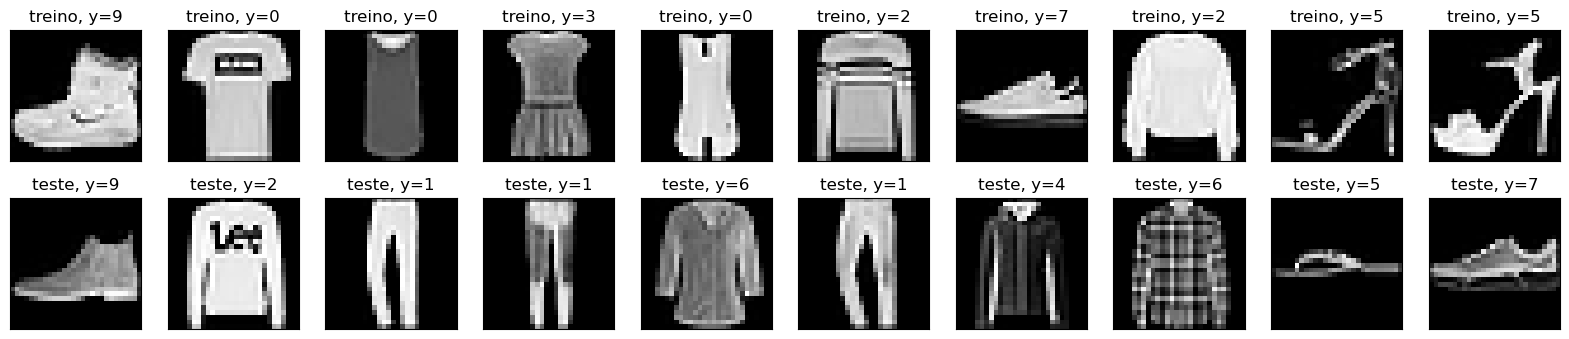

In [5]:
# mostrar as 10 primeiras imagens de treino e teste
(x_train, y_train),(x_test, y_test) = mnist.load_data()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # treino
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i])
  plt.title(f"treino, y={y_train[i]}")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # teste
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_test[i])
  plt.title(f"teste, y={y_test[i]}")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

A celula abaixo tem a definição de uma rede neural para ser usada no dataset MNIST. Você pode modifica-la como quiser (e.g. adicionar convoluções e/ou mais camadas ocultas) para melhorar o desempenho. Somente não pode modificar o número de neuronios de saida e a métrica de acurácia.



In [3]:
def get_mnist_network():
  network = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),       # 1 camada de entrada (achatando a entrada pra imagem 28x28 virar um vetor)
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) # 1 camada de saida com 10 neuronios (1 por classe)
  ])

  network.compile(optimizer='sgd',                        # otimizador SGD
                loss='sparse_categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  return network


A celula abaixo tem um exemplo de execucao da rede neural do MNIST naquele dataset. Modifique para executar por 10 épocas e adicione código para medir o tempo gasto.


In [4]:
network = get_mnist_network()                             # obtem a rede
(x_train, y_train),(x_test, y_test) = mnist.load_data()   # carrega o dataset
network.fit(x_train, y_train, epochs=5, verbose=0, callbacks=[TqdmCallback(verbose=2)])                   # treina a rede
loss, accuracy = network.evaluate(x_test, y_test)         # avalia a rede

2023-06-30 21:42:58.040363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 21:42:58.040734: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


0epoch [00:00, ?epoch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

313/313 [==============================] - 1s 3ms/step - loss: 225.3258 - accuracy: 0.8965


## Tarefa

Escreva código para executar redes neurais nos seguintes datasets:
- MNIST (pode aproveitar o codigo existente)
- Fashion MNIST
- CIFAR-10
- CIFAR-100

Cada execução deve ser por 10 épocas.

Você deve preencher as funções a seguir para retornarem a rede neural com a melhor configuração que você conseguiu para cada dataset (a do MNIST deve ser feita na `get_mnist_network()` acima).

IMPORTANTE: as funções não devem TREINAR nem AVALIAR  as redes neurais, apenas instancia-las e retorna-las.

Ao final, preencha o dict `results` com o desempenho encontrado em cada execução.

In [2]:
#TODO: implement specific networks for each dataset (with convolutional layers)
def get_mnist_network():
  
  network = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),    # 1 camada de convolução: 16 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
      tf.keras.layers.Conv2D(8, (3,3), activation='relu'),                               # 1 camada de convolução:8 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                  # max pooling 2x2
      tf.keras.layers.Flatten(),                                                        # achatar p/ entrar em MLP
      tf.keras.layers.Dense(10, activation='softmax')                                   # 1 camada de saida com 10 neuronios
  ])

  network.compile(optimizer='rmsprop',                        # otimizador SGD
                loss='sparse_categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  return network

def get_fashion_mnist_network():
  network = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),    # 1 camada de convolução: 16 filtros 3x3
    tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),                              # 1 camada de convolução: 8 filtros 3x3
    tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
    tf.keras.layers.Flatten(),                                                        # achatar p/ entrar em MLP
    tf.keras.layers.Dense(10, activation='softmax')                                   # 1 camada de saida com 10 neuronios
  ])

  network.compile(optimizer='rmsprop',                        # otimizador SGD
                loss='sparse_categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  return network

def get_cifar10_network():
  network = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)),    # 1 camada de convolução: 16 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             # 1 camada de convolução: 32 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
      tf.keras.layers.Flatten(),                                                        # achatar p/ entrar em MLP
      tf.keras.layers.Dense(128, activation='sigmoid'),                                 # 1 camada escondida com 128 neuronios                                
      tf.keras.layers.Dense(10, activation='softmax')                                   # 1 camada de saida com 10 neuronios
  ])

  network.compile(optimizer='rmsprop',                        # otimizador SGD
                loss='sparse_categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  return network

def get_cifar100_network():
  network = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)),    # 1 camada de convolução: 16 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                             # 1 camada de convolução: 32 filtros 3x3
      tf.keras.layers.MaxPool2D((2,2)),                                                 # max pooling 2x2
      tf.keras.layers.Flatten(),                                                        # achatar p/ entrar em MLP
      tf.keras.layers.Dense(128, activation='sigmoid'),                                 # 1 camada escondida com 128 neuronios                                
      tf.keras.layers.Dense(100, activation='softmax')                                  # 1 camada de saida com 10 neuronios
  ])

  network.compile(optimizer='rmsprop',                        # otimizador SGD
                loss='sparse_categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  return network

def evaluate_network(network, dataset, epochs=10, normalize=False, max_value=255.0):
  (train_images, train_labels), (test_images, test_labels) = dataset.load_data() # carrega o dataset 

  # se normalize=True, normaliza as imagens dividindo pelo valor maximo (default 255 pra pixel com cor)
  if(normalize):
    train_images, test_images = train_images / max_value, test_images / max_value

  network.fit(train_images, train_labels, epochs=epochs, verbose=0, callbacks=[TqdmCallback(verbose=2)])  # treina a rede
  loss, accuracy = network.evaluate(test_images, test_labels)         # avalia a rede
  return loss, accuracy



## Teste das redes

### Mnist

In [10]:
minst_network = get_mnist_network()      # obtem a rede
evaluate_network(minst_network, mnist)   # avalia a rede

0epoch [00:00, ?epoch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

313/313 [==============================] - 1s 3ms/step - loss: 0.1651 - accuracy: 0.9549


(0.16510573029518127, 0.9549000263214111)

### Fashion Mnist

In [12]:
fashion_minst_network = get_fashion_mnist_network()      # obtem a rede
evaluate_network(fashion_minst_network, fashion_mnist)   # avalia a rede

0epoch [00:00, ?epoch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

  0%|          | 0.00/1.88k [00:00<?, ?batch/s]

313/313 [==============================] - 1s 3ms/step - loss: 0.5289 - accuracy: 0.8205


(0.5289269089698792, 0.8205000162124634)

### CIFAR 10

In [6]:
cifar10_network = get_cifar10_network()
evaluate_network(cifar10_network, cifar10, normalize=True)

0epoch [00:00, ?epoch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

313/313 [==============================] - 2s 5ms/step - loss: 0.9631 - accuracy: 0.6716


(0.9631162881851196, 0.6715999841690063)

### CIFAR 100

In [3]:
cifar100_network = get_cifar100_network()
evaluate_network(cifar100_network, cifar100, normalize=True)

2023-07-01 02:12:01.407239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 02:12:01.412413: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


0epoch [00:00, ?epoch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

  0%|          | 0.00/1.56k [00:00<?, ?batch/s]

313/313 [==============================] - 2s 4ms/step - loss: 2.6815 - accuracy: 0.3486


(2.6814799308776855, 0.34860000014305115)

Preencha o dict abaixo substituindo os None com a acuracia final (acc) e o tempo de treinamento (time) encontrado no seu experimento pra cada dataset

In [ ]:
results = {
    "mnist": {"time": None, "acc": 0.9549},
    "fashion_mnist": {"time": None, "acc": 0.82},
    "cifar10": {"time": None, "acc": None},
    "cifar100": {"time": None, "acc": None},
}